# AI for Biotechnology
<span style="color:#AAA;font-size:14px;" >Prof. Dr. Dominik Grimm</span>  
<span style="color:#AAA;font-size:14px;">Bioinformatics Research Lab</span>  
<span style="color:#AAA;font-size:14px;">TUM Campus Straubing for Biotechnology and Sustainability</span>  

## Support Vector Machines Exercise #6
In this exercise we would like to compare the performance of different kernels using a Support Vector Machine. We would like to predict whether we can predict if a certain patient is a responder for a certain drug or not. We have a dataset with 400 patients and for each patient we measured for 600 genes the degree of expression of these genes. 

Let's first load the data:

In [1]:
%matplotlib inline
import pylab as pl
import numpy as np

#Load plant genotype and phenotype
X = np.loadtxt("patients_genes.csv", delimiter=",")
y = np.loadtxt("responder.txt")

print("No Samples:\t%d" % X.shape[0])
print("No Features:\t%d" % X.shape[1])
print("Non-Responder:\t%d" % (y==0).sum())
print("Responder:\t%d" % (y==1).sum())

No Samples:	400
No Features:	600
Non-Responder:	200
Responder:	200


First we will run a baseline model for comparision. For this purpose we use a simple logistic regression without any regualrization. We perform a 10-fold cross-validation and store the TPR, FPR and AUC values for each fold. Finally, we compute the AUC and report the result:

In [2]:
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

#10-fold cross-validation
cv = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)

list_fpr_lr = []
list_tpr_lr = []
auc_values_lr = []

#train simple logistic regression without any penalty
for train_index, val_index in cv.split(X,y):
    #Split data
    X_train = X[train_index]
    X_val = X[val_index]
    y_train = y[train_index]
    y_val = y[val_index]
    
    #Train Model
    model = LogisticRegression(penalty="none",solver="lbfgs",max_iter=4000)
    model.fit(X_train,y_train)
    
    #compute metrics for ROC Curve
    scores = model.decision_function(X_val)
    fpr, tpr, thresholds = metrics.roc_curve(y_val, scores, drop_intermediate=False)
    
    list_fpr_lr.append(fpr)
    list_tpr_lr.append(tpr)
    
    y_pred = model.predict(X_val)
    auc_values_lr.append(metrics.roc_auc_score(y_val, y_pred))


#print results
print("Logistic Regression")
print("ROC-AUC:\t%.2f (+-%.2f)" % (np.mean(auc_values_lr),np.std(auc_values_lr)))

Logistic Regression
ROC-AUC:	0.76 (+-0.04)


We will use the TPR and FPR values to plot the mean ROC curve across all 10 folds. With transparent values we illustrate the standard deviation of the ROC curve among all folds:

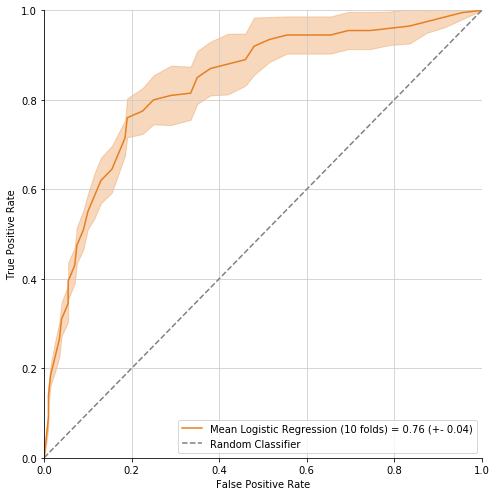

In [3]:
#generate figure
fig = pl.figure(figsize=(7,7))
ax = fig.add_subplot(111)

mean_fpr_lr = np.mean(list_fpr_lr,axis=0)
std_fpr_lr = np.std(list_fpr_lr,axis=0)

mean_tpr_lr = np.mean(list_tpr_lr,axis=0)
std_tpr_lr = np.std(list_tpr_lr,axis=0)

#plot roc curve for all 10 foldes
pl.plot(mean_fpr_lr, mean_tpr_lr,color="#e67e22",
        label="Mean Logistic Regression (10 folds) = %.2f (+- %.2f)" % (np.mean(auc_values_lr),np.std(auc_values_lr)))
#fill area between mean and mean +- std
pl.fill_between(mean_fpr_lr,
                mean_tpr_lr-std_tpr_lr,
                mean_tpr_lr+std_tpr_lr,
                alpha=0.3,color="#e67e22")

ax.plot([0,1], [0,1], color="grey",label="Random Classifier",linestyle="--")
#Set axis labels
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
#Set axis limits
ax.set_ylim(0,1)
ax.set_xlim(0,1)
#show grid in grey and set top and right axis to invisible
ax.grid(color="#CCCCCC")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
pl.legend()
pl.tight_layout()

We see that a logistic regression works better than a random predictor. In the following we will evaluate whether we might get a better predictive performance using a support vector machine with differenet kernels. 

## Exercise 6.1

Copy the code from the example above. Update the code to also report Precision, Recall, Accuracy and Matthew's Correlation Coefficient. 

In [4]:
#Your code comes here

cv = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)

list_fpr = []
list_tpr = []
auc_values = []
precision_values = []
recall_values = []
accuracy_values = []
mcc_values = []

#train simple logistic regression without any penalty
for train_index, val_index in cv.split(X,y):
    #Split data
    X_train = X[train_index]
    X_val = X[val_index]
    y_train = y[train_index]
    y_val = y[val_index]
    
    #Train Model
    model = LogisticRegression(penalty="none",solver="lbfgs",max_iter=4000)
    model.fit(X_train,y_train)
    
    #compute metrics for ROC Curve
    scores = model.decision_function(X_val)
    fpr, tpr, thresholds = metrics.roc_curve(y_val, scores, drop_intermediate=False)
    
    list_fpr.append(fpr)
    list_tpr.append(tpr)
    
    y_pred = model.predict(X_val)
    auc_values.append(metrics.roc_auc_score(y_val, y_pred))
    accuracy_values.append(metrics.accuracy_score(y_val, y_pred))
    recall_values.append(metrics.recall_score(y_val, y_pred))
    precision_values.append(metrics.precision_score(y_val, y_pred))
    mcc_values.append(metrics.matthews_corrcoef(y_val, y_pred))


#print results
print("Logistic Regression")
print("ROC-AUC:\t%.2f (+-%.2f)" % (np.mean(auc_values),np.std(auc_values)))
print("Accuracy:\t%.2f (+-%.2f)" % (np.mean(accuracy_values),np.std(accuracy_values)))
print("Recall:\t\t%.2f (+-%.2f)" % (np.mean(recall_values),np.std(recall_values)))
print("Precision:\t%.2f (+-%.2f)" % (np.mean(precision_values),np.std(precision_values)))
print("MCC:\t\t%.2f (+-%.2f)" % (np.mean(mcc_values),np.std(mcc_values)))

Logistic Regression
ROC-AUC:	0.76 (+-0.04)
Accuracy:	0.76 (+-0.04)
Recall:		0.76 (+-0.04)
Precision:	0.77 (+-0.06)
MCC:		0.53 (+-0.09)


## Exercise 6.2
Copy the code from the example above. Replace the Logistic Regression with a Support Vector Machine. Use a linear kernel and perform a 10-fold cross-validation witn an internal GridSearch (using 2 folds) for 10 different C values in the range of $[1e^{-4},1e^4]$ (using `np.logspace(-4,4,10)`). 

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

params = {"C": np.logspace(-4,4,10)} #The dictionary has one key "C". C can take 10 different values in log-scale

#Your code comes here

cv = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)

list_fpr_svm = []
list_tpr_svm = []
auc_values_svm = []
precision_values = []
recall_values = []
accuracy_values = []
mcc_values = []

#train simple logistic regression without any penalty
for train_index, val_index in cv.split(X,y):
    #Split data
    X_train = X[train_index]
    X_val = X[val_index]
    y_train = y[train_index]
    y_val = y[val_index]
    
    #Train Model
    svc = SVC(kernel="linear")
    gridsearch = GridSearchCV(svc,params, cv=2, scoring="accuracy", iid=False)
    gridsearch.fit(X_train,y_train)
    
    #compute metrics for ROC Curve
    scores = gridsearch.decision_function(X_val)
    fpr, tpr, thresholds = metrics.roc_curve(y_val, scores, drop_intermediate=False)
    
    list_fpr_svm.append(fpr)
    list_tpr_svm.append(tpr)
    
    y_pred = gridsearch.predict(X_val)
    auc_values_svm.append(metrics.roc_auc_score(y_val, y_pred))
    accuracy_values.append(metrics.accuracy_score(y_val, y_pred))
    recall_values.append(metrics.recall_score(y_val, y_pred))
    precision_values.append(metrics.precision_score(y_val, y_pred))
    mcc_values.append(metrics.matthews_corrcoef(y_val, y_pred))


#print results
print("Logistic Regression")
print("ROC-AUC:\t%.2f (+-%.2f)" % (np.mean(auc_values_svm),np.std(auc_values_svm)))
print("Accuracy:\t%.2f (+-%.2f)" % (np.mean(accuracy_values),np.std(accuracy_values)))
print("Recall:\t\t%.2f (+-%.2f)" % (np.mean(recall_values),np.std(recall_values)))
print("Precision:\t%.2f (+-%.2f)" % (np.mean(precision_values),np.std(precision_values)))
print("MCC:\t\t%.2f (+-%.2f)" % (np.mean(mcc_values),np.std(mcc_values)))

Logistic Regression
ROC-AUC:	0.82 (+-0.06)
Accuracy:	0.82 (+-0.06)
Recall:		0.81 (+-0.09)
Precision:	0.84 (+-0.07)
MCC:		0.65 (+-0.11)


** Extend the ROC-Plot from above with an additional line for the SVM: **

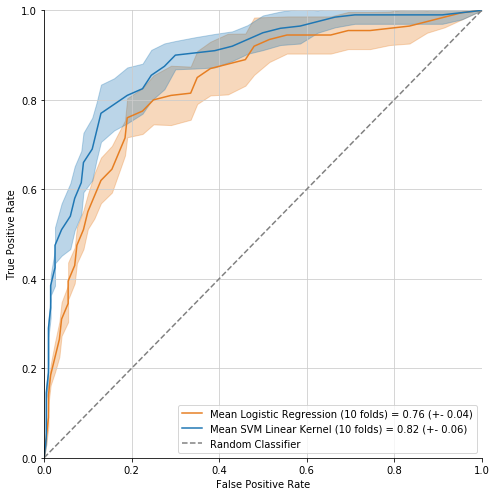

In [6]:
#Your code comes here:

fig = pl.figure(figsize=(7,7))
ax = fig.add_subplot(111)

mean_fpr_svm = np.mean(list_fpr_svm,axis=0)
std_fpr_svm = np.std(list_fpr_svm,axis=0)

mean_tpr_svm = np.mean(list_tpr_svm,axis=0)
std_tpr_svm = np.std(list_tpr_svm,axis=0)

mean_fpr_lr = np.mean(list_fpr_lr,axis=0)
std_fpr_lr = np.std(list_fpr_lr,axis=0)

mean_tpr_lr = np.mean(list_tpr_lr,axis=0)
std_tpr_lr = np.std(list_tpr_lr,axis=0)

#plot roc curve for all 10 foldes
pl.plot(mean_fpr_lr, mean_tpr_lr,color="#e67e22",
        label="Mean Logistic Regression (10 folds) = %.2f (+- %.2f)" % (np.mean(auc_values_lr),np.std(auc_values_lr)))
#fill area between mean and mean +- std
pl.fill_between(mean_fpr_lr,
                mean_tpr_lr-std_tpr_lr,
                mean_tpr_lr+std_tpr_lr,
                alpha=0.3,color="#e67e22")

#plot roc curve for all 10 foldes
pl.plot(mean_fpr_svm, mean_tpr_svm,color="tab:blue",
        label="Mean SVM Linear Kernel (10 folds) = %.2f (+- %.2f)" % (np.mean(auc_values_svm),np.std(auc_values_svm)))
#fill area between mean and mean +- std
pl.fill_between(mean_fpr_svm,
                mean_tpr_svm-std_tpr_svm,
                mean_tpr_svm+std_tpr_svm,
                alpha=0.3,color="tab:blue")

ax.plot([0,1], [0,1], color="grey",label="Random Classifier",linestyle="--")
#Set axis labels
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
#Set axis limits
ax.set_ylim(0,1)
ax.set_xlim(0,1)
#show grid in grey and set top and right axis to invisible
ax.grid(color="#CCCCCC")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
pl.legend()
pl.tight_layout()

** What do you observe? Does the SVM with a linear kernel perform better than a logistic regression without a penalty in predicting whether a certain patient is a responder or not? **

<span style="color:blue">The Model performs slightly better than a logistic regression without penalty </span>.


### Exercise 6.3
Train a SVM using a RBF Kernel and a 10-fold cross-validation with an internal Gridsearch (using 2-folds) to optimze C and gamma. Report the same performance measures as before and compare the results to the other models:

In [7]:
from sklearn.svm import SVC

params = {"C": np.logspace(-4,4,10),
          "gamma": np.logspace(-4,4,10)} #The dictionary has one key "C". C can take 10 different values in log-scale

#Your code comes here

cv = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)

list_fpr_svm_rbf = []
list_tpr_svm_rbf = []
auc_values_svm_rbf = []
precision_values = []
recall_values = []
accuracy_values = []
mcc_values = []

#train simple logistic regression without any penalty
for train_index, val_index in cv.split(X,y):
    #Split data
    X_train = X[train_index]
    X_val = X[val_index]
    y_train = y[train_index]
    y_val = y[val_index]
    
    #Train Model
    svc = SVC(kernel="rbf")
    gridsearch = GridSearchCV(svc,params, cv=2, scoring="accuracy", iid=False)
    gridsearch.fit(X_train,y_train)
    
    #compute metrics for ROC Curve
    scores = gridsearch.decision_function(X_val)
    fpr, tpr, thresholds = metrics.roc_curve(y_val, scores, drop_intermediate=False)
    
    list_fpr_svm_rbf.append(fpr)
    list_tpr_svm_rbf.append(tpr)
    
    y_pred = gridsearch.predict(X_val)
    auc_values_svm_rbf.append(metrics.roc_auc_score(y_val, y_pred))
    accuracy_values.append(metrics.accuracy_score(y_val, y_pred))
    recall_values.append(metrics.recall_score(y_val, y_pred))
    precision_values.append(metrics.precision_score(y_val, y_pred))
    mcc_values.append(metrics.matthews_corrcoef(y_val, y_pred))


#print results
print("Logistic Regression")
print("ROC-AUC:\t%.2f (+-%.2f)" % (np.mean(auc_values_svm_rbf),np.std(auc_values_svm_rbf)))
print("Accuracy:\t%.2f (+-%.2f)" % (np.mean(accuracy_values),np.std(accuracy_values)))
print("Recall:\t\t%.2f (+-%.2f)" % (np.mean(recall_values),np.std(recall_values)))
print("Precision:\t%.2f (+-%.2f)" % (np.mean(precision_values),np.std(precision_values)))
print("MCC:\t\t%.2f (+-%.2f)" % (np.mean(mcc_values),np.std(mcc_values)))

Logistic Regression
ROC-AUC:	0.85 (+-0.07)
Accuracy:	0.85 (+-0.07)
Recall:		0.83 (+-0.11)
Precision:	0.87 (+-0.07)
MCC:		0.71 (+-0.14)


**Add the results from the SVM with a RBF kernel to yur ROC plot and interpret the results? Which of the models is best?**

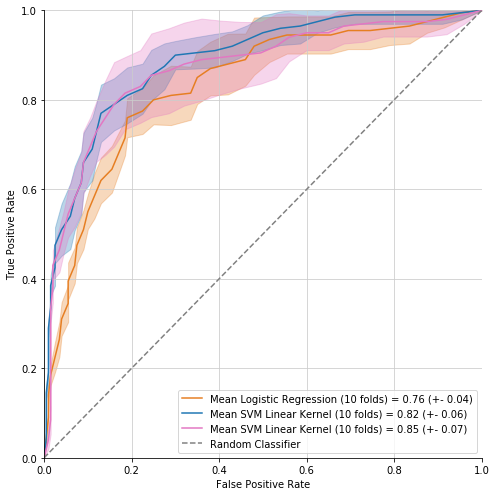

In [9]:
#Your code comes here:

fig = pl.figure(figsize=(7,7))
ax = fig.add_subplot(111)

mean_fpr_svm_rbf = np.mean(list_fpr_svm_rbf,axis=0)
std_fpr_svm_rbf = np.std(list_fpr_svm_rbf,axis=0)

mean_tpr_svm_rbf = np.mean(list_tpr_svm_rbf,axis=0)
std_tpr_svm_rbf = np.std(list_tpr_svm_rbf,axis=0)

mean_fpr_svm = np.mean(list_fpr_svm,axis=0)
std_fpr_svm = np.std(list_fpr_svm,axis=0)

mean_tpr_svm = np.mean(list_tpr_svm,axis=0)
std_tpr_svm = np.std(list_tpr_svm,axis=0)

mean_fpr_lr = np.mean(list_fpr_lr,axis=0)
std_fpr_lr = np.std(list_fpr_lr,axis=0)

mean_tpr_lr = np.mean(list_tpr_lr,axis=0)
std_tpr_lr = np.std(list_tpr_lr,axis=0)

#plot roc curve for all 10 foldes
pl.plot(mean_fpr_lr, mean_tpr_lr,color="#e67e22",
        label="Mean Logistic Regression (10 folds) = %.2f (+- %.2f)" % (np.mean(auc_values_lr),np.std(auc_values_lr)))
#fill area between mean and mean +- std
pl.fill_between(mean_fpr_lr,
                mean_tpr_lr-std_tpr_lr,
                mean_tpr_lr+std_tpr_lr,
                alpha=0.3,color="#e67e22")

pl.plot(mean_fpr_svm, mean_tpr_svm,color="tab:blue",
        label="Mean SVM Linear Kernel (10 folds) = %.2f (+- %.2f)" % (np.mean(auc_values_svm),np.std(auc_values_svm)))
#fill area between mean and mean +- std
pl.fill_between(mean_fpr_svm,
                mean_tpr_svm-std_tpr_svm,
                mean_tpr_svm+std_tpr_svm,
                alpha=0.3,color="tab:blue")

pl.plot(mean_fpr_svm_rbf, mean_tpr_svm_rbf,color="tab:pink",
        label="Mean SVM Linear Kernel (10 folds) = %.2f (+- %.2f)" % (np.mean(auc_values_svm_rbf),np.std(auc_values_svm_rbf)))
#fill area between mean and mean +- std
pl.fill_between(mean_fpr_svm_rbf,
                mean_tpr_svm_rbf-std_tpr_svm_rbf,
                mean_tpr_svm_rbf+std_tpr_svm_rbf,
                alpha=0.3,color="tab:pink")

ax.plot([0,1], [0,1], color="grey",label="Random Classifier",linestyle="--")
#Set axis labels
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
#Set axis limits
ax.set_ylim(0,1)
ax.set_xlim(0,1)
#show grid in grey and set top and right axis to invisible
ax.grid(color="#CCCCCC")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
pl.legend()
pl.tight_layout()